In [1]:
#importing Dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
#Seeting GPU
device='cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#Composing Transforms
transform_train=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])
transform_test=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5))])

In [4]:
#Loading Dataset and Creating DataLoaders
trainset=torchvision.datasets.MNIST(root='data',train=True,download=True,transform=transform_train)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=60,shuffle=True,num_workers=2)
testset=torchvision.datasets.MNIST(root='data',train=False,download=True,transform=transform_test)
testloader=torch.utils.data.DataLoader(testset,batch_size=60,shuffle=True,num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [27]:
Classes=('0','1','2','3','4','5','6','7','8','9')

In [5]:
print(len(trainset))

60000


In [19]:
#Defining Model
net=torchvision.models.resnet18()

In [15]:
#Checking Parameters, Notice that input channel size is 3 which we want to be 1 for greyscale image and output class number is 1000 which we want as 10.
print(net.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [20]:
#Customizing ResNet18 Model
net.conv1=nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
net.fc=nn.Linear(in_features=512, out_features=10, bias=True)

In [10]:
print(net.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [ ]:
#Checking output shape
def test():
    y = net(torch.randn(60, 1, 28, 28))
    print(y.size())

test()

torch.Size([60, 10])


In [21]:
#Defining instance, loss function and optimizer
net=net.to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
print(trainset[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

In [12]:
#Training Loop
def train(ep):
  net.eval()
  net.train()
  losses=[]
  for epoch in range(ep):
    running_loss=0
    for i,data in enumerate(trainloader,0):
      inputs,labels=data
      inputs,labels=inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=net(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
      if((i+1)%20==0):
        losses.append(running_loss/20)
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
        running_loss = 0.0
    
  return losses


In [22]:
losses=train(15)

[1,    20] loss: 1.817
[1,    40] loss: 0.705
[1,    60] loss: 0.432
[1,    80] loss: 0.313
[1,   100] loss: 0.270
[1,   120] loss: 0.225
[1,   140] loss: 0.233
[1,   160] loss: 0.207
[1,   180] loss: 0.168
[1,   200] loss: 0.165
[1,   220] loss: 0.151
[1,   240] loss: 0.151
[1,   260] loss: 0.114
[1,   280] loss: 0.135
[1,   300] loss: 0.153
[1,   320] loss: 0.132
[1,   340] loss: 0.113
[1,   360] loss: 0.128
[1,   380] loss: 0.149
[1,   400] loss: 0.121
[1,   420] loss: 0.142
[1,   440] loss: 0.102
[1,   460] loss: 0.091
[1,   480] loss: 0.116
[1,   500] loss: 0.104
[1,   520] loss: 0.110
[1,   540] loss: 0.091
[1,   560] loss: 0.094
[1,   580] loss: 0.082
[1,   600] loss: 0.106
[1,   620] loss: 0.104
[1,   640] loss: 0.080
[1,   660] loss: 0.089
[1,   680] loss: 0.090
[1,   700] loss: 0.084
[1,   720] loss: 0.061
[1,   740] loss: 0.077
[1,   760] loss: 0.100
[1,   780] loss: 0.066
[1,   800] loss: 0.077
[1,   820] loss: 0.084
[1,   840] loss: 0.099
[1,   860] loss: 0.084
[1,   880] 

Text(0, 0.5, 'Loss')

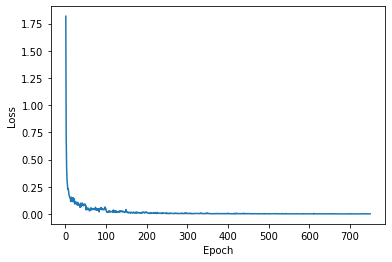

In [23]:
#Plotting Loss over Epochs in Training
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(1, len(losses), len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [26]:
#Testing Test Set
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [28]:
# prepare to count accuracy for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Zero  is 99.2 %
Accuracy for class: One   is 99.6 %
Accuracy for class: Two   is 99.0 %
Accuracy for class: Three is 98.8 %
Accuracy for class: Four  is 99.0 %
Accuracy for class: Five  is 99.3 %
Accuracy for class: Six   is 98.9 %
Accuracy for class: Seven is 99.0 %
Accuracy for class: Eight is 98.7 %
Accuracy for class: Nine  is 98.0 %
